In [1]:
import numpy as np
import matplotlib.pyplot as plt

def lg_plot(XX, yy, yy_predict):
    plt.figure()
    plt.plot(XX, yy, "b.")
    plt.plot(XX, yy_predict, "r")
    plt.axis([-3, 3, -3, 20])
    plt.show()

In [2]:
# 生成数据，带噪声的二次曲线
m = 100
X = np.arange(-3, 3, 6/m).reshape((m, 1))
y = 2 * X**2 + np.random.randn(m, 1)
print(X.shape)
print(y.shape)

(100, 1)
(100, 1)


(100, 1)


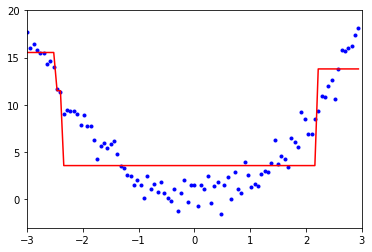

In [3]:
# 手动GBDT

from sklearn.tree import DecisionTreeRegressor

tree_reg1 = DecisionTreeRegressor(max_depth=2)
tree_reg1.fit(X, y)
y1 = tree_reg1.predict(X).reshape((m, 1))
print(y1.shape)
lg_plot(X, y, y1)

(100, 1)


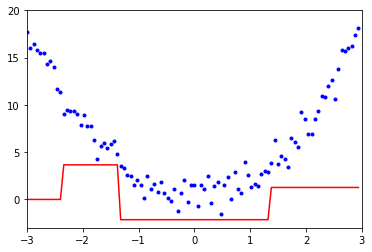

In [4]:
tree_reg2 = DecisionTreeRegressor(max_depth=2)
tree_reg2.fit(X, y - y1)
y2 = tree_reg2.predict(X).reshape((m, 1))
print(y2.shape)
lg_plot(X, y, y2)

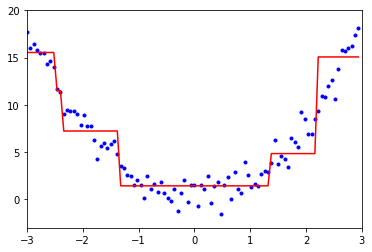

In [5]:
lg_plot(X, y, y1 + y2)

(100, 1)


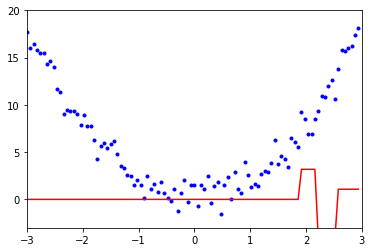

In [6]:
tree_reg3 = DecisionTreeRegressor(max_depth=2)
tree_reg3.fit(X, y - y1 - y2)
y3 = tree_reg3.predict(X).reshape((m, 1))
print(y3.shape)
lg_plot(X, y, y3)

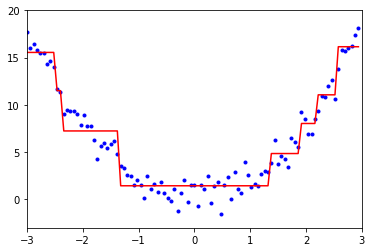

In [7]:
lg_plot(X, y, y1 + y2 + y3)

(100, 1)


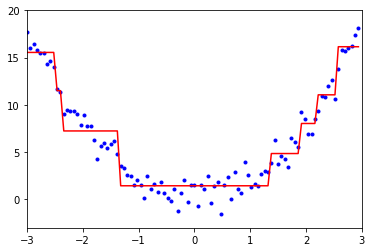

In [8]:
# GBDT in sklearn
from sklearn.ensemble import GradientBoostingRegressor

gbrt = GradientBoostingRegressor(max_depth=2, n_estimators=3, learning_rate=1.0)
gbrt.fit(X, y.ravel())
y_gb = gbrt.predict(X).reshape((m, 1))
print(y_gb.shape)
lg_plot(X, y, y_gb)


(100, 1)


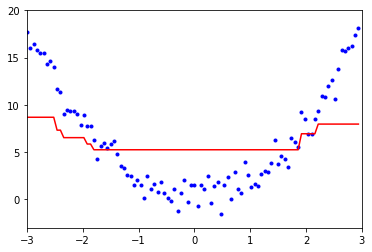

In [9]:
# 预测器数量的影响

# 欠拟合
gbrt1 = GradientBoostingRegressor(max_depth=2, n_estimators=3, learning_rate=0.1)
gbrt1.fit(X, y.ravel())
y_gb1 = gbrt1.predict(X).reshape((m, 1))
print(y_gb1.shape)
lg_plot(X, y, y_gb1)

(100, 1)


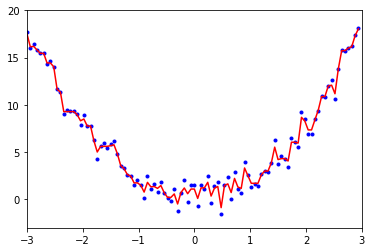

In [10]:
# 过拟合
gbrt2 = GradientBoostingRegressor(max_depth=2, n_estimators=200, learning_rate=0.1)
gbrt2.fit(X, y.ravel())
y_gb2 = gbrt2.predict(X).reshape((m, 1))
print(y_gb2.shape)
lg_plot(X, y, y_gb2)